In [21]:
n=20

#   Step1:
Read data &    modify some data 

 Read TFIDF data created 

 Save the expanded similarity matrix to a CSV file  - TDIDF
large_csv_file_path = 'Data/large_recipe_similarity_matrix.csv'
similarity_df=pd.read_csv(large_csv_file_path)
large_csv_file_path

   Below is extracted bert similarity score for similarity_df[1:5000] recipes
 cs_df.index=data[data['title'].isin(TF-ITFsimilarity_df.columns[1:5000])]['title'][:5000]
cs_df_5000by5000 f0r n=50000

# Step2 
  compare both.

### step1: Take any additional filtering steps needed.

In [29]:
# Read bert similarties subset data.
import pandas as pd,numpy as np
Bert_Similarity_data=pd.read_csv('/Users/divyamereddy/Documents/PHD/projects/Home Automation/Food_Suggestions_System/RecipeBert/Data/large_cs_df_1000by1000.csv')

In [36]:
Bert_Similarity_data.head()

,title,No-Bake Nut Cookies,Jewell Ball'S Chicken,Creamy Corn,Chicken Funny,Reeses Cups(Candy),Cheeseburger Potato Soup,Rhubarb Coffee Cake,Scalloped Corn,Nolan'S Pepper Steak,...,Chicken Casserole.6,Favorite Chocolate Cake,Blue Muffins,Devils Chicken(Pollo Alla Diavola),Friendship Tea,Heath Bar Pie,Victorian Baked French Toast,Quick Swedish Meatballs,Irish Stew(Microwave),Peach Salad
0,No-Bake Nut Cookies,1.000000,0.699594,0.827853,0.750264,0.856169,0.752827,0.863322,0.838288,0.671305,...,0.745726,0.910214,0.873059,0.712209,0.803028,0.849205,0.872201,0.747553,0.699511,0.895803
1,Jewell Ball'S Chicken,0.699594,1.000000,0.828485,0.930571,0.761244,0.903871,0.690412,0.851365,0.881437,...,0.935799,0.708525,0.746992,0.901497,0.629618,0.774651,0.803928,0.891001,0.914006,0.748032
2,Creamy Corn,0.827853,0.828485,1.000000,0.776187,0.888144,0.854178,0.800791,0.945211,0.795480,...,0.816201,0.838063,0.826031,0.740918,0.727127,0.804760,0.881509,0.829285,0.875247,0.805319
3,Chicken Funny,0.750264,0.930571,0.776187,1.000000,0.722364,0.889387,0.724555,0.794984,0.856210,...,0.943884,0.732743,0.781228,0.921442,0.628739,0.799566,0.817372,0.875236,0.854705,0.788333
4,Reeses Cups(Candy),0.856169,0.761244,0.888144,0.722364,1.000000,0.750533,0.828082,0.911492,0.690053,...,0.743809,0.865183,0.851020,0.683263,0.794049,0.799356,0.867077,0.744413,0.779376,0.854350


In [37]:
Bert_Similarity_data=Bert_Similarity_data.set_index('title')

(19, 19)


,Jewell Ball'S Chicken,Creamy Corn,Chicken Funny,Reeses Cups(Candy),Cheeseburger Potato Soup,Rhubarb Coffee Cake,Scalloped Corn,Nolan'S Pepper Steak,Millionaire Pie,Double Cherry Delight,Buckeye Candy,Quick Barbecue Wings,Taco Salad Chip Dip,Pink Stuff(Frozen Dessert),Fresh Strawberry Pie,Easy German Chocolate Cake,Broccoli Salad,Strawberry Whatever,Eggless Milkless Applesauce Cake
title,,,,,,,,,,,,,,,,,,,
Jewell Ball'S Chicken,1.000000,0.828485,0.930571,0.761244,0.903871,0.690412,0.851365,0.881437,0.766633,0.683113,0.733446,0.924089,0.895211,0.750552,0.740887,0.647437,0.880797,0.721239,0.664356
Creamy Corn,0.828485,1.000000,0.776187,0.888144,0.854178,0.800791,0.945211,0.795480,0.782341,0.760647,0.882884,0.816773,0.817208,0.829205,0.835969,0.742629,0.799327,0.794945,0.779418
Chicken Funny,0.930571,0.776187,1.000000,0.722364,0.889387,0.724555,0.794984,0.856210,0.803493,0.737061,0.724530,0.880623,0.885579,0.741003,0.775459,0.689912,0.885744,0.753915,0.708491
Reeses Cups(Candy),0.761244,0.888144,0.722364,1.000000,0.750533,0.828082,0.911492,0.690053,0.826013,0.789231,0.958335,0.726937,0.757737,0.894813,0.823345,0.771111,0.737391,0.864729,0.798218
Cheeseburger Potato Soup,0.903871,0.854178,0.889387,0.750533,1.000000,0.780661,0.857806,0.920928,0.765543,0.718940,0.768499,0.846731,0.967337,0.743553,0.774784,0.712959,0.910993,0.755829,0.732554
Rhubarb Coffee Cake,0.690412,0.800791,0.724555,0.828082,0.780661,1.000000,0.840969,0.703002,0.844700,0.850772,0.868367,0.644748,0.802309,0.840019,0.860477,0.797813,0.759014,0.843998,0.879450
Scalloped Corn,0.851365,0.945211,0.794984,0.911492,0.857806,0.840969,1.000000,0.809125,0.815759,0.789725,0.907392,0.831242,0.837270,0.848906,0.832336,0.746486,0.823963,0.824408,0.791481
Nolan'S Pepper Steak,0.881437,0.795480,0.856210,0.690053,0.920928,0.703002,0.809125,1.000000,0.746734,0.689713,0.696079,0.841780,0.918538,0.700809,0.724731,0.619036,0.928233,0.695797,0.661389
Millionaire Pie,0.766633,0.782341,0.803493,0.826013,0.765543,0.844700,0.815759,0.746734,1.000000,0.873241,0.826852,0.678554,0.798482,0.910526,0.882895,0.760379,0.815561,0.937825,0.864781


In [44]:
Bert_Similarity_data.loc['Fresh Strawberry Pie','Strawberry Whatever']

title
Fresh Strawberry Pie    0.869865
Fresh Strawberry Pie    0.898157
Name: Strawberry Whatever, dtype: float64

####  check if needed: Remove Duplicates RecipeA, RecipeB is duplicate of RecipeB, Recipe A. I should have taken only upper or down triangle of matric

 Read data TDIDF and original data 
    Process data if needed

In [56]:
#large_csv_file_path = 'Data/large_recipe_similarity_matrix.csv' #this is TD-IDF similarity matrix
large_csv_file_path = '/Users/divyamereddy/Documents/PHD/projects/Home Automation/Food_Suggestions_System/RecipeBert/Data/recipe_similarity_matrix.csv'
TF_ITF_similarity_df=pd.read_csv(large_csv_file_path)
large_csv_file_path

'/Users/divyamereddy/Documents/PHD/projects/Home Automation/Food_Suggestions_System/RecipeBert/Data/recipe_similarity_matrix.csv'

In [57]:
TF_ITF_similarity_df

,Unnamed: 0,No-Bake Nut Cookies,Jewell Ball'S Chicken,Creamy Corn,Chicken Funny,Reeses Cups(Candy),Cheeseburger Potato Soup,Rhubarb Coffee Cake,Scalloped Corn,Nolan'S Pepper Steak,...,*Apricot Salad,Pound Cake,Monkey Bread,Chicken Roll-Ups,Beef And Spanish Rice Casserole,Baked Beans,Sweet-N-Sour Chicken,Ambrosia,Crazy Peanut Butter Cookies,Brickle Bars
0,No-Bake Nut Cookies,1.000000,0.000000,0.068567,0.033579,0.073766,0.117307,0.116224,0.034335,0.016019,...,0.086619,0.132998,0.170944,0.056334,0.080002,0.152236,0.125131,0.012127,0.077532,0.066812
1,Jewell Ball'S Chicken,0.000000,1.000000,0.042902,0.219706,0.000000,0.155356,0.061696,0.063745,0.168972,...,0.101412,0.044323,0.000000,0.190383,0.095189,0.049872,0.043204,0.000000,0.000000,0.016064
2,Creamy Corn,0.068567,0.042902,1.000000,0.136229,0.166850,0.188023,0.193945,0.227602,0.022466,...,0.172958,0.085870,0.055155,0.091007,0.065163,0.154239,0.158973,0.000000,0.054918,0.000000
3,Chicken Funny,0.033579,0.219706,0.136229,1.000000,0.040513,0.128001,0.000000,0.100594,0.019700,...,0.193552,0.034603,0.076212,0.246913,0.123735,0.021381,0.143785,0.094593,0.000000,0.068786
4,Reeses Cups(Candy),0.073766,0.000000,0.166850,0.040513,1.000000,0.057846,0.081350,0.142590,0.023085,...,0.081975,0.081061,0.067725,0.000000,0.000000,0.065344,0.069714,0.015456,0.316679,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Baked Beans,0.152236,0.049872,0.154239,0.021381,0.065344,0.228553,0.120376,0.090677,0.145648,...,0.048968,0.048633,0.073456,0.059231,0.109311,1.000000,0.213655,0.073805,0.026463,0.014128
96,Sweet-N-Sour Chicken,0.125131,0.043204,0.158973,0.143785,0.069714,0.075546,0.037243,0.022091,0.138473,...,0.097160,0.040917,0.136680,0.115570,0.055389,0.213655,1.000000,0.033979,0.017321,0.000000
97,Ambrosia,0.012127,0.000000,0.000000,0.094593,0.015456,0.051467,0.013374,0.031061,0.036850,...,0.030878,0.029680,0.049179,0.077853,0.059892,0.073805,0.033979,1.000000,0.026849,0.062505
98,Crazy Peanut Butter Cookies,0.077532,0.000000,0.054918,0.000000,0.316679,0.034954,0.145489,0.099313,0.000000,...,0.020363,0.087077,0.029442,0.000000,0.000000,0.026463,0.017321,0.026849,1.000000,0.062725


In [59]:
TF_ITF_similarity_df=TF_ITF_similarity_df.set_index('Unnamed: 0')

In [60]:
#read TFIDF data
print(TF_ITF_similarity_df.iloc[1:n,1:n].shape)
TF_ITF_similarity_df.iloc[1:n,1:n]

(19, 19)


,Jewell Ball'S Chicken,Creamy Corn,Chicken Funny,Reeses Cups(Candy),Cheeseburger Potato Soup,Rhubarb Coffee Cake,Scalloped Corn,Nolan'S Pepper Steak,Millionaire Pie,Double Cherry Delight,Buckeye Candy,Quick Barbecue Wings,Taco Salad Chip Dip,Pink Stuff(Frozen Dessert),Fresh Strawberry Pie,Easy German Chocolate Cake,Broccoli Salad,Strawberry Whatever,Eggless Milkless Applesauce Cake
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Jewell Ball'S Chicken,1.000000,0.042902,0.219706,0.000000,0.155356,0.061696,0.063745,0.168972,0.029986,0.011450,0.000000,0.036511,0.112475,0.039374,0.000000,0.000000,0.000000,0.142822,0.000000
Creamy Corn,0.042902,1.000000,0.136229,0.166850,0.188023,0.193945,0.227602,0.022466,0.000000,0.124752,0.232257,0.000000,0.167433,0.032253,0.067687,0.053847,0.000000,0.103859,0.094765
Chicken Funny,0.219706,0.136229,1.000000,0.040513,0.128001,0.000000,0.100594,0.019700,0.115244,0.108386,0.243033,0.057009,0.263829,0.175703,0.000000,0.000000,0.118307,0.065615,0.000000
Reeses Cups(Candy),0.000000,0.166850,0.040513,1.000000,0.057846,0.081350,0.142590,0.023085,0.256322,0.019090,0.477387,0.000000,0.101683,0.000000,0.016510,0.075053,0.081666,0.090512,0.016779
Cheeseburger Potato Soup,0.155356,0.188023,0.128001,0.057846,1.000000,0.092725,0.207598,0.055138,0.019711,0.051081,0.157392,0.000000,0.242368,0.053196,0.065146,0.022274,0.298971,0.059980,0.083241
Rhubarb Coffee Cake,0.061696,0.193945,0.000000,0.081350,0.092725,1.000000,0.091534,0.099990,0.000000,0.036558,0.076391,0.033101,0.000000,0.000000,0.083077,0.000000,0.012528,0.000000,0.199284
Scalloped Corn,0.063745,0.227602,0.100594,0.142590,0.207598,0.091534,1.000000,0.040934,0.147600,0.043996,0.051751,0.000000,0.051939,0.102991,0.013545,0.023467,0.000000,0.091446,0.027533
Nolan'S Pepper Steak,0.168972,0.022466,0.019700,0.023085,0.055138,0.099990,0.040934,1.000000,0.024299,0.029020,0.000000,0.030945,0.179899,0.086660,0.059719,0.018523,0.085175,0.050819,0.000000
Millionaire Pie,0.029986,0.000000,0.115244,0.256322,0.019711,0.000000,0.147600,0.024299,1.000000,0.022052,0.000000,0.000000,0.112643,0.413958,0.000000,0.000000,0.073258,0.239310,0.000000


In [61]:
TF_ITF_similarity_df.loc['Fresh Strawberry Pie','Strawberry Whatever']

0.2687139368960652

## Compare both the files/ matrixs

In [63]:
TF_ITF_similarity_df.index

Index(['No-Bake Nut Cookies', 'Jewell Ball'S Chicken', 'Creamy Corn',
       'Chicken Funny', 'Reeses Cups(Candy)  ', 'Cheeseburger Potato Soup',
       'Rhubarb Coffee Cake', 'Scalloped Corn', 'Nolan'S Pepper Steak',
       'Millionaire Pie', 'Double Cherry Delight', 'Buckeye Candy',
       'Quick Barbecue Wings', 'Taco Salad Chip Dip',
       'Pink Stuff(Frozen Dessert)  ', 'Fresh Strawberry Pie',
       'Easy German Chocolate Cake', 'Broccoli Salad', 'Strawberry Whatever',
       'Eggless Milkless Applesauce Cake',
       'Grandma Hanrath'S Banana Breadfort Collins, Colorado  ',
       'Chocolate Frango Mints', 'Cuddy Farms Marinated Turkey',
       'Spaghetti Sauce To Can', 'Prize-Winning Meat Loaf',
       'Smothered Round Steak(Servings: 4)  ',
       'Corral Barbecued Beef Steak Strips', 'Easy Fudge',
       'Taco-Filled Green Pepper', 'One Hour Rolls', 'Punch Bowl Fruit Salad',
       'Summer Chicken', 'Cherry Pizza', 'Potato And Cheese Pie',
       'Tuna Macaroni Casserole', '

In [62]:
Bert_Similarity_data.index

Index(['No-Bake Nut Cookies', 'Jewell Ball'S Chicken', 'Creamy Corn',
       'Chicken Funny', 'Reeses Cups(Candy)  ', 'Cheeseburger Potato Soup',
       'Rhubarb Coffee Cake', 'Scalloped Corn', 'Nolan'S Pepper Steak',
       'Millionaire Pie',
       ...
       'Chicken Casserole', 'Favorite Chocolate Cake', 'Blue Muffins',
       'Devils Chicken(Pollo Alla Diavola)  ', 'Friendship Tea',
       'Heath Bar Pie', 'Victorian Baked French Toast',
       'Quick Swedish Meatballs', 'Irish Stew(Microwave)  ', 'Peach Salad'],
      dtype='object', name='title', length=1000)

In [ ]:
Bert_Similarity_data.loc['Scalloped Corn','Creamy Corn'] # mutiple values, so we will take average

In [176]:
# Find common columns and row indices
common_cols = TF_ITF_similarity_df.columns.intersection(Bert_Similarity_data.columns)
common_rows = TF_ITF_similarity_df.index.intersection(Bert_Similarity_data.index)

# Extract sub-dataframes with only common rows and columns
common_TF_ITF_similarity_df = TF_ITF_similarity_df.loc[common_rows, common_cols]
common_Bert_Similarity_data = Bert_Similarity_data.loc[common_rows, common_cols]


# Group by index and columns and take the mean for common_df2
common_Bert_Similarity_data = common_Bert_Similarity_data.groupby(level=0, axis=0).mean()
common_Bert_Similarity_data = common_Bert_Similarity_data.groupby(level=0, axis=1).mean()

# Sort columns
common_TF_ITF_similarity_df.sort_index(axis=1, inplace=True)

# Sort rows
common_TF_ITF_similarity_df.sort_index(axis=0, inplace=True)

# Sort columns
common_Bert_Similarity_data.sort_index(axis=1, inplace=True)

# Sort rows
common_Bert_Similarity_data.sort_index(axis=0, inplace=True)

# If you're using pandas version >= 1.1.0, you can use groupby with axis parameter:
# common_df2 = common_df2.groupby(axis=0, level=0).mean()
# common_df2 = common_df2.groupby(axis=1, level=0).mean()

# Perform comparison (For example, calculating the difference)
comparison_similarity = common_Bert_Similarity_data-common_TF_ITF_similarity_df 


In [177]:
common_TF_ITF_similarity_df

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
*Apricot Salad,1.000000,0.030878,0.070460,0.090406,0.024449,0.093636,0.048968,0.055509,0.100205,0.016203,...,0.040011,0.000000,0.097160,0.132350,0.169584,0.063013,0.096156,0.132661,0.169791,0.010997
Ambrosia,0.030878,1.000000,0.015037,0.009663,0.032237,0.000000,0.073805,0.059892,0.019033,0.021364,...,0.000000,0.000000,0.033979,0.052112,0.087669,0.035837,0.062497,0.036243,0.058147,0.014500
Angel Biscuits,0.070460,0.015037,1.000000,0.046967,0.193314,0.000000,0.101926,0.000000,0.111808,0.179265,...,0.096462,0.000000,0.108751,0.017549,0.016230,0.023637,0.030519,0.000000,0.110888,0.097757
Annie'S Diabetic Candy,0.090406,0.009663,0.046967,1.000000,0.025756,0.055248,0.037232,0.000000,0.098902,0.017069,...,0.081822,0.000000,0.094949,0.126666,0.116124,0.036005,0.006166,0.025673,0.105544,0.011585
Apple Crisp,0.024449,0.032237,0.193314,0.025756,1.000000,0.000000,0.090712,0.079820,0.108315,0.286741,...,0.035155,0.000000,0.032293,0.000000,0.000000,0.000000,0.020569,0.000000,0.044000,0.330278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taco-Filled Green Pepper,0.063013,0.035837,0.023637,0.036005,0.000000,0.000000,0.309623,0.137192,0.000000,0.000000,...,0.027666,0.019108,0.045864,0.338313,0.500732,1.000000,0.187979,0.102767,0.213352,0.025013
Three Bean Salad,0.096156,0.062497,0.030519,0.006166,0.020569,0.034823,0.215724,0.070048,0.049488,0.013631,...,0.070670,0.034675,0.046164,0.056764,0.012616,0.187979,1.000000,0.211488,0.063291,0.090328
Tuna Macaroni Casserole,0.132661,0.036243,0.000000,0.025673,0.000000,0.133313,0.073155,0.079228,0.024707,0.000000,...,0.000000,0.000000,0.014373,0.092414,0.070564,0.102767,0.211488,1.000000,0.047182,0.000000
Vegetable-Burger Soup,0.169791,0.058147,0.110888,0.105544,0.044000,0.031982,0.199069,0.129650,0.094432,0.018779,...,0.046372,0.032028,0.074887,0.148300,0.225871,0.213352,0.063291,0.047182,1.000000,0.082852


In [178]:
common_Bert_Similarity_data

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
*Apricot Salad,1.000001,0.887524,0.874020,0.903411,0.888546,0.866487,0.794612,0.803694,0.798400,0.888316,...,0.772720,0.829646,0.861499,0.882053,0.869085,0.810650,0.830161,0.878414,0.820694,0.912412
Ambrosia,0.899037,0.937214,0.793249,0.840952,0.872334,0.767514,0.711800,0.717220,0.730508,0.802161,...,0.742643,0.747647,0.797341,0.795016,0.765838,0.731117,0.781167,0.794557,0.726908,0.894540
Angel Biscuits,0.874020,0.793795,1.000000,0.861348,0.891439,0.823545,0.719665,0.719621,0.812029,0.906056,...,0.710681,0.762893,0.788710,0.789174,0.745794,0.715026,0.766217,0.796227,0.720301,0.880311
Annie'S Diabetic Candy,0.903411,0.822861,0.861348,1.000000,0.856093,0.788711,0.704300,0.719883,0.736493,0.864663,...,0.684453,0.777925,0.773484,0.827863,0.775775,0.725658,0.786997,0.815502,0.733817,0.884226
Apple Crisp,0.888546,0.857183,0.891439,0.856093,1.000000,0.771016,0.703794,0.710799,0.748136,0.874580,...,0.715805,0.703774,0.795208,0.792263,0.754010,0.685661,0.773399,0.772670,0.701241,0.932240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taco-Filled Green Pepper,0.810650,0.757248,0.715026,0.725658,0.685661,0.893984,0.930861,0.931174,0.787191,0.758537,...,0.834948,0.904771,0.892018,0.916635,0.935220,1.000000,0.816065,0.891358,0.949830,0.738647
Three Bean Salad,0.830161,0.797735,0.766217,0.786997,0.773399,0.805725,0.813545,0.755060,0.723155,0.761982,...,0.717253,0.792036,0.789622,0.806750,0.770099,0.816065,1.000000,0.781681,0.820638,0.821862
Tuna Macaroni Casserole,0.878414,0.806801,0.796227,0.815502,0.772670,0.889121,0.859586,0.880789,0.754362,0.848756,...,0.836956,0.904258,0.895574,0.934429,0.932193,0.891358,0.781681,1.000000,0.892831,0.816648
Vegetable-Burger Soup,0.820694,0.723926,0.720301,0.733817,0.701241,0.860339,0.926067,0.903831,0.741213,0.754869,...,0.821702,0.900450,0.892392,0.918248,0.940167,0.949830,0.820638,0.892831,1.000000,0.733310


In [179]:

comparison_similarity

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
*Apricot Salad,5.000000e-07,0.856647,8.035598e-01,8.130054e-01,0.864097,0.772851,0.745645,0.748185,0.698195,0.872114,...,0.732709,0.829646,0.764339,0.749704,0.699502,7.476370e-01,7.340049e-01,7.457530e-01,6.509032e-01,9.014152e-01
Ambrosia,8.681595e-01,-0.062786,7.782116e-01,8.312890e-01,0.840097,0.767514,0.637995,0.657328,0.711474,0.780797,...,0.742643,0.747647,0.763362,0.742904,0.678169,6.952805e-01,7.186695e-01,7.583137e-01,6.687610e-01,8.800396e-01
Angel Biscuits,8.035598e-01,0.778757,1.000000e-07,8.143810e-01,0.698125,0.823545,0.617739,0.719621,0.700220,0.726791,...,0.614219,0.762893,0.679959,0.771625,0.729564,6.913888e-01,7.356985e-01,7.962267e-01,6.094123e-01,7.825537e-01
Annie'S Diabetic Candy,8.130054e-01,0.813198,8.143810e-01,-1.000000e-07,0.830337,0.733463,0.667068,0.719883,0.637591,0.847593,...,0.602630,0.777925,0.678535,0.701197,0.659650,6.896533e-01,7.808319e-01,7.898294e-01,6.282726e-01,8.726412e-01
Apple Crisp,8.640972e-01,0.824946,6.981248e-01,8.303366e-01,0.000000,0.771016,0.613082,0.630979,0.639821,0.587839,...,0.680651,0.703774,0.762915,0.792263,0.754010,6.856607e-01,7.528302e-01,7.726700e-01,6.572409e-01,6.019620e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taco-Filled Green Pepper,7.476370e-01,0.721411,6.913888e-01,6.896533e-01,0.685661,0.893984,0.621238,0.793982,0.787191,0.758537,...,0.807282,0.885662,0.846153,0.578322,0.434488,1.000000e-07,6.280860e-01,7.885912e-01,7.364781e-01,7.136342e-01
Three Bean Salad,7.340049e-01,0.735238,7.356985e-01,7.808319e-01,0.752830,0.770902,0.597821,0.685012,0.673668,0.748351,...,0.646583,0.757361,0.743458,0.749986,0.757483,6.280860e-01,-2.400000e-07,5.701938e-01,7.573464e-01,7.315336e-01
Tuna Macaroni Casserole,7.457530e-01,0.770558,7.962267e-01,7.898294e-01,0.772670,0.755807,0.786431,0.801561,0.729655,0.848756,...,0.836956,0.904258,0.881201,0.842015,0.861629,7.885912e-01,5.701938e-01,-1.000000e-07,8.456482e-01,8.166485e-01
Vegetable-Burger Soup,6.509032e-01,0.665780,6.094123e-01,6.282726e-01,0.657241,0.828357,0.726998,0.774181,0.646780,0.736090,...,0.775330,0.868422,0.817505,0.769948,0.714296,7.364781e-01,7.573464e-01,8.456482e-01,-1.000000e-07,6.504571e-01


In [109]:
#common_TF_ITF_similarity_df.loc['Scalloped Corn','Creamy Corn']
common_TF_ITF_similarity_df.loc["Annie'S Diabetic Candy","*Apricot Salad"]

0.0904060409735243

In [108]:
#common_Bert_Similarity_data.loc['Scalloped Corn','Creamy Corn']
common_Bert_Similarity_data.loc["Annie'S Diabetic Candy","*Apricot Salad"]

0.9034114

In [135]:
#comparison_similarity.loc['Scalloped Corn','Creamy Corn']
comparison_similarity.loc["Annie'S Diabetic Candy","Annie'S Diabetic Candy"]
#comparison_similarity.loc["Annie'S Diabetic Candy","*Apricot Salad"]

9.999999994736442e-08

In [157]:
common_TF_ITF_similarity_df.describe()

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.092330,0.053472,0.102096,0.092522,0.089962,0.039889,0.125100,0.075661,0.074220,0.048744,...,0.077998,0.019111,0.098206,0.101838,0.109675,0.097291,0.060506,0.060698,0.125679,0.083573
std,0.113797,0.112268,0.130233,0.109524,0.124675,0.103692,0.129563,0.119635,0.103746,0.119536,...,0.118489,0.100930,0.116252,0.122421,0.127624,0.132160,0.105072,0.108555,0.116670,0.117620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034359,0.013741,0.032162,0.036794,0.017415,0.000000,0.051123,0.000000,0.029076,0.000000,...,0.018389,0.000000,0.034375,0.030943,0.022979,0.000000,0.016562,0.000000,0.054763,0.018987
50%,0.064000,0.030562,0.072271,0.083347,0.057800,0.021432,0.093297,0.052270,0.055928,0.016636,...,0.048828,0.000000,0.071711,0.073132,0.087086,0.052766,0.040106,0.039493,0.108216,0.060522
75%,0.131125,0.059920,0.122725,0.116121,0.119797,0.046123,0.152736,0.096251,0.098894,0.039468,...,0.111235,0.013977,0.133787,0.138656,0.161377,0.139056,0.070204,0.081170,0.164827,0.111543
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
common_Bert_Similarity_data.describe()

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.857817,0.794214,0.799293,0.807367,0.791749,0.836462,0.806790,0.812314,0.780349,0.821872,...,0.772582,0.814994,0.831962,0.835377,0.834441,0.817202,0.780249,0.838737,0.812828,0.813676
std,0.053229,0.055636,0.079067,0.072994,0.084083,0.048071,0.087601,0.087519,0.053067,0.064578,...,0.080442,0.067728,0.068437,0.061644,0.076082,0.091553,0.043745,0.054012,0.090678,0.076851
min,0.697350,0.657329,0.612656,0.631876,0.576163,0.680474,0.576958,0.598467,0.629229,0.664042,...,0.599508,0.645043,0.668978,0.668145,0.657952,0.610717,0.659308,0.695147,0.587071,0.606440
25%,0.823298,0.763794,0.737844,0.749327,0.732067,0.813716,0.738588,0.743368,0.747810,0.774653,...,0.715711,0.762748,0.783777,0.789217,0.766322,0.742276,0.756449,0.795814,0.734275,0.758302
50%,0.864325,0.798535,0.801462,0.822542,0.798673,0.846245,0.796228,0.821514,0.783967,0.840435,...,0.761356,0.825022,0.825449,0.834510,0.827410,0.813680,0.783744,0.839919,0.811139,0.819255
75%,0.896009,0.824443,0.865596,0.864934,0.856562,0.866296,0.886975,0.888621,0.814505,0.876212,...,0.833944,0.872559,0.889917,0.881137,0.902080,0.901087,0.805844,0.879008,0.897307,0.874770
max,1.000001,0.937214,1.000000,1.000000,1.000000,0.967714,0.944819,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.981018,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
comparison_similarity.describe()

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-7.654869e-01,-0.740742,-6.971967e-01,-7.148450e-01,-0.701787,-0.796573,-0.681691,-7.366530e-01,-7.061287e-01,-7.731279e-01,...,-6.945845e-01,-7.958826e-01,-7.337557e-01,-0.733539,-7.247655e-01,-7.199110e-01,-7.197427e-01,-7.780391e-01,-6.871487e-01,-7.301030e-01
std,1.047122e-01,0.104986,1.132539e-01,1.052437e-01,0.119714,0.098504,0.121996,1.065976e-01,9.470231e-02,1.095350e-01,...,1.129319e-01,1.020331e-01,1.092468e-01,0.101188,1.055785e-01,1.116176e-01,8.739598e-02,9.712146e-02,1.090051e-01,1.273674e-01
min,-9.150863e-01,-0.874729,-8.723564e-01,-8.825279e-01,-0.903461,-0.938429,-0.850578,-8.884689e-01,-8.465322e-01,-8.859530e-01,...,-8.879693e-01,-9.068029e-01,-8.812013e-01,-0.874083,-8.822196e-01,-8.906800e-01,-8.070204e-01,-9.285109e-01,-8.802850e-01,-9.184870e-01
25%,-8.293320e-01,-0.790707,-7.766965e-01,-7.786518e-01,-0.775104,-0.845321,-0.768787,-8.001720e-01,-7.517077e-01,-8.417718e-01,...,-7.547104e-01,-8.582561e-01,-8.080806e-01,-0.790030,-7.907957e-01,-7.824413e-01,-7.624556e-01,-8.201200e-01,-7.632579e-01,-8.153364e-01
50%,-7.652945e-01,-0.764076,-7.061541e-01,-7.123578e-01,-0.705259,-0.809651,-0.689543,-7.489463e-01,-7.115456e-01,-7.870386e-01,...,-7.005141e-01,-8.053612e-01,-7.501487e-01,-0.745081,-7.402338e-01,-7.292084e-01,-7.317268e-01,-7.861848e-01,-6.859735e-01,-7.481564e-01
75%,-7.183363e-01,-0.704728,-6.459937e-01,-6.686373e-01,-0.632928,-0.770055,-0.629019,-6.846835e-01,-6.735312e-01,-7.434696e-01,...,-6.452678e-01,-7.577389e-01,-6.800088e-01,-0.692036,-6.764637e-01,-6.767897e-01,-6.965404e-01,-7.589128e-01,-6.334752e-01,-6.662692e-01
max,-5.000000e-07,0.062786,-1.000000e-07,1.000000e-07,0.000000,0.032286,0.055181,2.220446e-16,-2.000000e-07,-1.000000e-07,...,-1.000000e-07,-1.000000e-07,2.400000e-07,0.018982,2.220446e-16,-1.000000e-07,2.400000e-07,1.000000e-07,1.000000e-07,3.600000e-07


<AxesSubplot:>

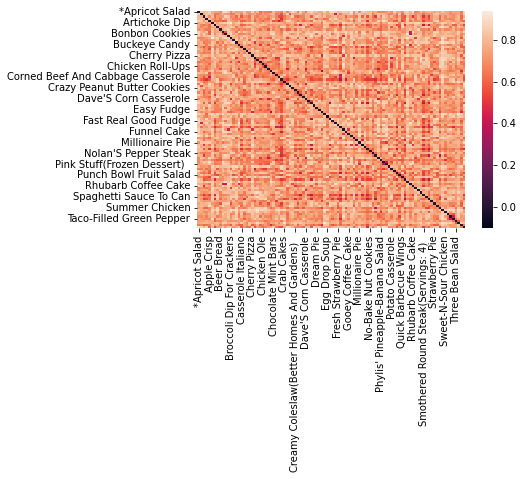

In [180]:
sns.heatmap(comparison_similarity)

In [ ]:
# Analysizing Corelation with a statistical test

In [164]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Flatten the matrices and compute Pearson correlation
flattened_common_TF_ITF_similarity_df = common_TF_ITF_similarity_df.to_numpy().flatten()
flattened_common_Bert_Similarity_data = common_Bert_Similarity_data.to_numpy().flatten()

correlation_coefficient, _ = pearsonr(flattened_common_Bert_Similarity_data, flattened_common_TF_ITF_similarity_df)
#spearmanr
correlation_coefficient_s, _ = spearmanr(flattened_common_Bert_Similarity_data, flattened_common_TF_ITF_similarity_df)

print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Interpretation
if correlation_coefficient > 0.5:
    print("The matrices are positively correlated.")
elif correlation_coefficient < -0.5:
    print("The matrices are negatively correlated.")
else:
    print("The matrices are not strongly correlated.")
print('correlation_coefficient_s',correlation_coefficient_s)


Pearson correlation coefficient: 0.4009571854945122
The matrices are not strongly correlated.
correlation_coefficient_s 0.36108650727981784


In [141]:
common_Bert_Similarity_data

,*Apricot Salad,Ambrosia,Angel Biscuits,Annie'S Diabetic Candy,Apple Crisp,Artichoke Dip,Baked Beans,Beef And Spanish Rice Casserole,Beer Bread,Blueberry Surprise,...,Summer Chicken,Summer Spaghetti,Sweet-N-Sour Chicken,Taco Dip,Taco Salad Chip Dip,Taco-Filled Green Pepper,Three Bean Salad,Tuna Macaroni Casserole,Vegetable-Burger Soup,Watermelon Rind Pickles
*Apricot Salad,1.000001,0.887524,0.874020,0.903411,0.888546,0.866487,0.794612,0.803694,0.798400,0.888316,...,0.772720,0.829646,0.861499,0.882053,0.869085,0.810650,0.830161,0.878414,0.820694,0.912412
Ambrosia,0.899037,0.937214,0.793249,0.840952,0.872334,0.767514,0.711800,0.717220,0.730508,0.802161,...,0.742643,0.747647,0.797341,0.795016,0.765838,0.731117,0.781167,0.794557,0.726908,0.894540
Angel Biscuits,0.874020,0.793795,1.000000,0.861348,0.891439,0.823545,0.719665,0.719621,0.812029,0.906056,...,0.710681,0.762893,0.788710,0.789174,0.745794,0.715026,0.766217,0.796227,0.720301,0.880311
Annie'S Diabetic Candy,0.903411,0.822861,0.861348,1.000000,0.856093,0.788711,0.704300,0.719883,0.736493,0.864663,...,0.684453,0.777925,0.773484,0.827863,0.775775,0.725658,0.786997,0.815502,0.733817,0.884226
Apple Crisp,0.888546,0.857183,0.891439,0.856093,1.000000,0.771016,0.703794,0.710799,0.748136,0.874580,...,0.715805,0.703774,0.795208,0.792263,0.754010,0.685661,0.773399,0.772670,0.701241,0.932240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taco-Filled Green Pepper,0.810650,0.757248,0.715026,0.725658,0.685661,0.893984,0.930861,0.931174,0.787191,0.758537,...,0.834948,0.904771,0.892018,0.916635,0.935220,1.000000,0.816065,0.891358,0.949830,0.738647
Three Bean Salad,0.830161,0.797735,0.766217,0.786997,0.773399,0.805725,0.813545,0.755060,0.723155,0.761982,...,0.717253,0.792036,0.789622,0.806750,0.770099,0.816065,1.000000,0.781681,0.820638,0.821862
Tuna Macaroni Casserole,0.878414,0.806801,0.796227,0.815502,0.772670,0.889121,0.859586,0.880789,0.754362,0.848756,...,0.836956,0.904258,0.895574,0.934429,0.932193,0.891358,0.781681,1.000000,0.892831,0.816648
Vegetable-Burger Soup,0.820694,0.723926,0.720301,0.733817,0.701241,0.860339,0.926067,0.903831,0.741213,0.754869,...,0.821702,0.900450,0.892392,0.918248,0.940167,0.949830,0.820638,0.892831,1.000000,0.733310


In [149]:
common_TF_ITF_similarity_df

,No-Bake Nut Cookies,Jewell Ball'S Chicken,Creamy Corn,Chicken Funny,Reeses Cups(Candy),Cheeseburger Potato Soup,Rhubarb Coffee Cake,Scalloped Corn,Nolan'S Pepper Steak,Millionaire Pie,...,*Apricot Salad,Pound Cake,Monkey Bread,Chicken Roll-Ups,Beef And Spanish Rice Casserole,Baked Beans,Sweet-N-Sour Chicken,Ambrosia,Crazy Peanut Butter Cookies,Brickle Bars
No-Bake Nut Cookies,1.000000,0.000000,0.068567,0.033579,0.073766,0.117307,0.116224,0.034335,0.016019,0.028541,...,0.086619,0.132998,0.170944,0.056334,0.080002,0.152236,0.125131,0.012127,0.077532,0.066812
Jewell Ball'S Chicken,0.000000,1.000000,0.042902,0.219706,0.000000,0.155356,0.061696,0.063745,0.168972,0.029986,...,0.101412,0.044323,0.000000,0.190383,0.095189,0.049872,0.043204,0.000000,0.000000,0.016064
Creamy Corn,0.068567,0.042902,1.000000,0.136229,0.166850,0.188023,0.193945,0.227602,0.022466,0.000000,...,0.172958,0.085870,0.055155,0.091007,0.065163,0.154239,0.158973,0.000000,0.054918,0.000000
Chicken Funny,0.033579,0.219706,0.136229,1.000000,0.040513,0.128001,0.000000,0.100594,0.019700,0.115244,...,0.193552,0.034603,0.076212,0.246913,0.123735,0.021381,0.143785,0.094593,0.000000,0.068786
Reeses Cups(Candy),0.073766,0.000000,0.166850,0.040513,1.000000,0.057846,0.081350,0.142590,0.023085,0.256322,...,0.081975,0.081061,0.067725,0.000000,0.000000,0.065344,0.069714,0.015456,0.316679,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baked Beans,0.152236,0.049872,0.154239,0.021381,0.065344,0.228553,0.120376,0.090677,0.145648,0.026372,...,0.048968,0.048633,0.073456,0.059231,0.109311,1.000000,0.213655,0.073805,0.026463,0.014128
Sweet-N-Sour Chicken,0.125131,0.043204,0.158973,0.143785,0.069714,0.075546,0.037243,0.022091,0.138473,0.129152,...,0.097160,0.040917,0.136680,0.115570,0.055389,0.213655,1.000000,0.033979,0.017321,0.000000
Ambrosia,0.012127,0.000000,0.000000,0.094593,0.015456,0.051467,0.013374,0.031061,0.036850,0.058337,...,0.030878,0.029680,0.049179,0.077853,0.059892,0.073805,0.033979,1.000000,0.026849,0.062505
Crazy Peanut Butter Cookies,0.077532,0.000000,0.054918,0.000000,0.316679,0.034954,0.145489,0.099313,0.000000,0.000000,...,0.020363,0.087077,0.029442,0.000000,0.000000,0.026463,0.017321,0.026849,1.000000,0.062725


In [166]:
common_TF_ITF_similarity_df.loc['Summer Chicken','Taco Salad Chip Dip']

0.0189968444621319

In [167]:
common_Bert_Similarity_data.loc['Summer Chicken','Summer Spaghetti']
#['Taco Dip','Taco-Filled Green Pepper']#Taco-Filled Green Pepper,Taco Salad Chip Dip

0.8298672

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the pairwise Pearson correlation between elements
correlation_matrix = common_Bert_Similarity_data.corrwith(common_TF_ITF_similarity_df)


In [169]:
correlation_matrix

*Apricot Salad              0.397738
Ambrosia                    0.374414
Angel Biscuits              0.504301
Annie'S Diabetic Candy      0.390720
Apple Crisp                 0.395040
                              ...   
Taco-Filled Green Pepper    0.553313
Three Bean Salad            0.578243
Tuna Macaroni Casserole     0.449313
Vegetable-Burger Soup       0.470361
Watermelon Rind Pickles     0.194601
Length: 100, dtype: float64

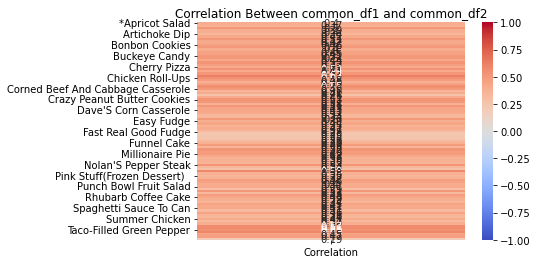

In [170]:

# Generate a heatmap using Seaborn
sns.heatmap(pd.DataFrame(correlation_matrix).rename(columns={0: 'Correlation'})#.set_index(pd.Index([0]))
,
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between common_df1 and common_df2')
plt.show()

In [172]:
correlation_matrix

*Apricot Salad              0.397738
Ambrosia                    0.374414
Angel Biscuits              0.504301
Annie'S Diabetic Candy      0.390720
Apple Crisp                 0.395040
                              ...   
Taco-Filled Green Pepper    0.553313
Three Bean Salad            0.578243
Tuna Macaroni Casserole     0.449313
Vegetable-Burger Soup       0.470361
Watermelon Rind Pickles     0.194601
Length: 100, dtype: float64

In [2]:
correlation_matrix.describe()

NameError: name 'correlation_matrix' is not defined

In [1]:
1

1